## 6장 1절 단순 선형 회귀(Simple Linear Regression Model)

### 2. 정규방정식

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df_insurance = pd.read_csv('./data/insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


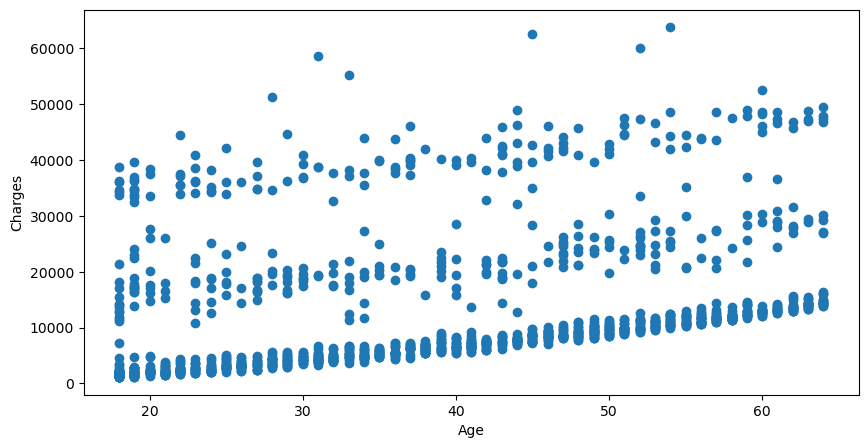

In [4]:
x = df_insurance['age']
y = df_insurance['charges']

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [9]:
x = np.array(df_insurance['age'])
y = np.array(df_insurance['charges'])

x = x.reshape(1338,1)
y = y.reshape(1338,1)

lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [10]:
print('[선형 회귀 모델 결과]')
print('절편: ', lr.intercept_, '계수: ', lr.coef_)

[선형 회귀 모델 결과]
절편:  [3165.88500606] 계수:  [[257.72261867]]


In [11]:
print('결정계수: ', lr.score(x, y))

결정계수:  0.08940589967885804


In [12]:
x_new=[[19],[64]]
y_hat = lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


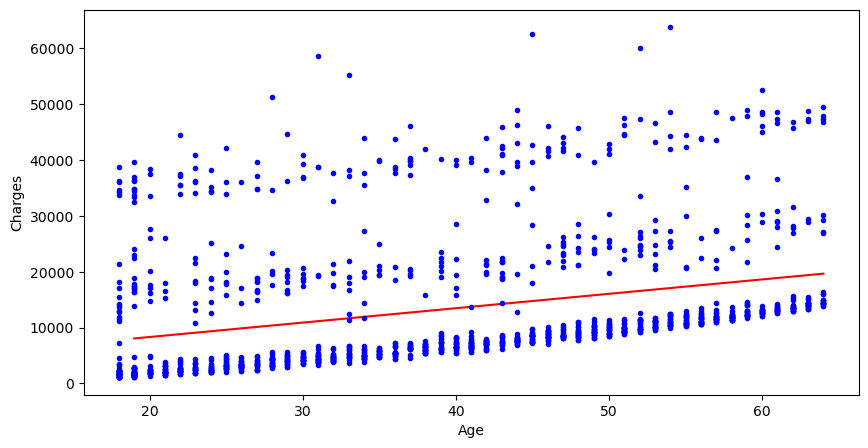

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r")
plt.plot(x, y, "b.")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### 3. 경사하강법

In [2]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np

In [3]:
df_insurance = pd.read_csv('./data/insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
x = np.array(df_insurance['age'])
y = np.array(df_insurance['charges'])
x, y

(array([19, 18, 28, ..., 18, 21, 61], dtype=int64),
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]))

In [6]:
x.shape, y.shape

((1338,), (1338,))

In [10]:
x = x.reshape(1338,1)
y = y.reshape(1338,1)
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [12]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x, y.ravel())
sgd_reg

SGDRegressor(random_state=34)

In [13]:
print('SGD 회귀 모델 결과')
print('절편: ', sgd_reg.intercept_, "계수: ", sgd_reg.coef_)

SGD 회귀 모델 결과
절편:  [9141.2455153] 계수:  [482.40826847]


In [18]:
x_new = [[19], [34], [50], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[18307.00261619 25543.1266432  33261.65893868 40015.37469723]


In [19]:
import matplotlib.pyplot as plt

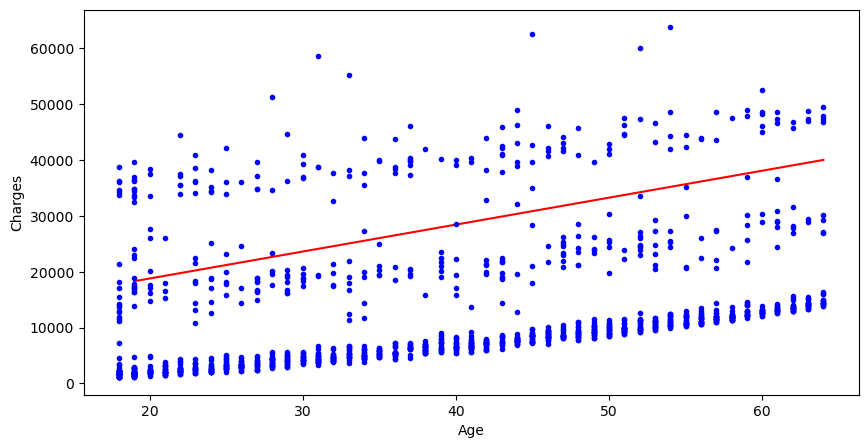

In [20]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r")
plt.plot(x, y, 'b.')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()